<style>
    /* Cover page styling */
    .cover-page {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
        height: 100vh;
        font-family: 'Times New Roman', Times, serif;
        text-align: center;
    }
    .title {
        font-size: 36px;
        font-weight: bold;
        margin-bottom: 20px;
    }
    .subtitle {
        font-size: 24px;
        margin-bottom: 40px;
    }
    .author, .institution, .student-id, .date {
        font-size: 18px;
        margin-bottom: 10px;
    }

    /* General styling for all Markdown cells */
    div.text_cell_render {
        font-family: 'Times New Roman', Times, serif;
        font-size: 14px; /* Adjust this size as needed */
    }
</style>

<div class="cover-page">
    <div class="title">Midterm Assignment</div>
    <div class="author">Author: Beyza Kordan</div>
    <div class="institution">MSc in Economics and Data Analytics, University College Dublin</div>
    <div class="student-id">Student ID: 23205963</div>
    <div class="date">Date: 29 October 2024</div>
</div>


**Question 1**

**Load in the weather_1819.csv dataset into Python as a pandas DataFrame. Describe the data. How many years of recordings are included? What is the temporal resolution of th data? Which weather measurements are reported?**

In [75]:
import pandas as pd
# Loading the dataset with descriptive column names
file_path = 'C:/Users/pc/Downloads/weather_1819.csv'
columns = ['Day', 'Month', 'Year', 'Station', 'Max Temperature', 'Min Temperature', 
           'Rainfall', 'Max Wind Gust', 'Min Wind Gust', 'Sunshine Hours']
weather_data = pd.read_csv(file_path, skiprows=15, names=columns)

# Displaying the first few rows
print("📌 First Few Rows of the Dataset\n")
print(weather_data.head().to_string(index=False, justify='center'))

# Displaying the years 
years = weather_data['Year'].unique()
print("\n📅 Years of Recordings Included\n")
print("Years:", years)
print("Number of Unique Years:", len(years))

# Days recorded per month for 2018 and 2019
distinct_days_per_month = weather_data.groupby(['Year', 'Month', 'Day']).size().groupby(['Year', 'Month']).size()
distinct_days_df = distinct_days_per_month.unstack(level=0).reset_index().fillna('-')
distinct_days_df.columns = ['Month', '2018', '2019']
distinct_days_df['Month'] = distinct_days_df['Month'].str.capitalize()

print("\n🗓️ Days Recorded Per Month (2018 vs. 2019)\n")
print(distinct_days_df.to_string(index=False, justify='center'))

# Determining temporal resolution
temporal_resolution = "Daily" if distinct_days_per_month.min() >= 28 else "Irregular or less frequent than daily"
print("\n⏰ Temporal Resolution\n")
print("Temporal Resolution:", temporal_resolution)

# Listing weather measurements
print("\n📊 Weather Measurements Reported\n")
print("Measurements:", weather_data.columns.tolist())

# Explanation of each measurement type
print("\n📝 Type of Weather Measurements\n")
measurement_types = {
    'Max Temperature': 'Maximum temperature in degrees Celsius',
    'Min Temperature': 'Minimum temperature in degrees Celsius',
    'Rainfall': 'Rainfall amount in millimeters',
    'Max Wind Gust': 'Maximum wind gust speed in meters per second',
    'Min Wind Gust': 'Minimum wind gust speed in meters per second',
    'Sunshine Hours': 'Total hours of sunshine per day'}
for column, description in measurement_types.items():
    print(f"{column}: {description}")

# Displaying data types of each column
print("\n📂 Data Types of Each Column\n")
print(weather_data.dtypes)

📌 First Few Rows of the Dataset

 Day Month  Year    Station      Max Temperature  Min Temperature  Rainfall  Max Wind Gust  Min Wind Gust  Sunshine Hours
 4    jan   2018 Dublin Airport       9.3               3.4          10.7        14.6           48.0            1.3      
 5    jan   2018 Dublin Airport       6.7              -1.0           0.0         6.6           16.0            3.3      
 6    jan   2018 Dublin Airport       6.2              -0.8           0.1        14.1           31.0            2.4      
 7    jan   2018 Dublin Airport       6.1              -0.1           0.0         9.9           21.0            3.2      
 8    jan   2018 Dublin Airport       5.6              -2.5           0.0        11.2           27.0            4.1      

📅 Years of Recordings Included

Years: [2018 2019]
Number of Unique Years: 2

🗓️ Days Recorded Per Month (2018 vs. 2019)

Month  2018  2019
 Apr    30    30 
 Aug    31    31 
 Dec    31    31 
 Feb    28    28 
 Jan    31    31 
 Jul

**Question 2**

**Determine how many missing values there are in each column of the dataset. Can you think of a reason why these values are missing? Discuss different strategies for filling the missing values, highlighting the advantages and disadvantages of each strategy, in the context of this dataset.**

In [77]:
missing_values = weather_data.isnull().sum()
# Creating a DataFrame to display missing values
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values
}).sort_values(by='Missing Values', ascending=False).reset_index(drop=True)

# Adding a Status column
missing_df['Status'] = missing_df['Missing Values'].apply(
    lambda x: "✖ Missing Values" if x > 0 else "✔ No Missing Values")

# Specifying the order of columns
desired_order = ['Rainfall', 'Max Temperature', 'Min Temperature', 
                 'Min Wind Gust', 'Sunshine Hours', 'Max Wind Gust', 
                 'Day', 'Month', 'Year', 'Station']

# Reordering the DataFrame
missing_df = missing_df[missing_df['Column'].isin(desired_order)]
missing_df = missing_df.set_index('Column').reindex(desired_order).reset_index()

print("❗ Missing Values Summary\n ")  # Added newline for spacing

# Displaying the DataFrame in the specified order with numbering starting from 1
for index, row in missing_df.iterrows():
    space = " " if index + 1 != 10 else ""
    output_line = (
        f"{index + 1}.{space} {row['Column']: <25} "
        f"{row['Missing Values']: <15} {row['Status']}")
    print(output_line)

❗ Missing Values Summary
 
1.  Rainfall                  23              ✖ Missing Values
2.  Max Temperature           18              ✖ Missing Values
3.  Min Temperature           18              ✖ Missing Values
4.  Min Wind Gust             16              ✖ Missing Values
5.  Sunshine Hours            7               ✖ Missing Values
6.  Max Wind Gust             5               ✖ Missing Values
7.  Day                       0               ✔ No Missing Values
8.  Month                     0               ✔ No Missing Values
9.  Year                      0               ✔ No Missing Values
10. Station                   0               ✔ No Missing Values


Missing data is a common issue in weather datasets, often due to factors affecting data collection. Understanding the causes of these gaps is essential for selecting an appropriate method to handle missing values, which can help maintain dataset accuracy and reliability.

Reasons for Missing Values

*Equipment Failures: Weather stations rely on sensors to measure variables such as temperature, wind speed, and rainfall, which may malfunction, especially during extreme weather. In this dataset, 18 temperature and 16 wind gust entries are missing, likely due to technical issues or wear over time. Such gaps are typical in long-term datasets where sensor maintenance varies across stations.

*Environmental Conditions: Environmental factors, like cloudy days or storms, can also disrupt data collection. For example, 7 missing entries for sunshine hours may reflect overcast days or temporary sensor issues, while 23 gaps in rainfall data could result from rain gauge clogs or damage during heavy rainfall events. Seasonal changes, such as reduced sunlight in winter, may also lead to missing values in affected variables.

*Differences Across Stations: Not all weather stations track the same variables. Some stations only record basic metrics like temperature and rainfall, while others monitor additional factors like wind speed and sunshine. This can lead to variable-specific gaps, especially in datasets aggregated from multiple stations with differing measurement capabilities.

Strategies for Handling Missing Values

-Mean or Median Imputation: Replacing missing values with the column’s mean or median is a straightforward approach, effective for small, random gaps. For example, filling missing temperature values with the seasonal average preserves the trend, though it may mask seasonal fluctuations if applied broadly.

-Forward or Backward Fill: This approach uses the last available or next available value to fill gaps, effective for short-term gaps in stable variables like rainfall or temperature. However, it may create artificial patterns if applied over long stretches, as it assumes constant conditions.

-Interpolation (Linear or Seasonal): Interpolation estimates missing values based on surrounding data points. Linear interpolation suits continuous data with gradual trends, such as temperature, while seasonal interpolation is better for cyclical patterns, such as sunshine hours. However, interpolation may not capture abrupt changes, like sudden rainfall.

-Zero Imputation: Filling missing values with zero can be appropriate when zero has a meaningful interpretation, such as for rainfall, where a missing value might imply no rain. However, zero imputation is unsuitable for continuous variables like temperature or wind speed, where zero may indicate an extreme condition rather than a lack of data.

-Machine Learning-Based Imputation: Advanced techniques like regression models or k-nearest neighbors predict missing values based on relationships between variables. This approach is beneficial for datasets with substantial gaps or interdependent variables but requires additional computational resources and may be unnecessary for datasets with minimal missing data.

By analyzing the reasons behind missing data and considering each variable’s characteristics, the most suitable imputation strategy can be selected. A carefully chosen method preserves the dataset’s integrity, ensuring that subsequent analyses yield reliable insights.

**Question 3**

**Write code to answer the following questions:**
**1. At what station and on what date was the highest wind speed recorded?**
**2. At what station and on what date was the highest maximum air temperature recorded?**
**3. At what station and on what date was the largest amount of rain recorded?**

In [79]:
# 1. At what station and on what date was the highest wind speed recorded?
highest_wind = weather_data.loc[weather_data['Max Wind Gust'].idxmax()]
print("🚩 1. Highest Wind Speed\n")
print(f"Station: {highest_wind['Station']}")
print(
    f"Date: {highest_wind['Day']:02d}-{highest_wind['Month']}-{highest_wind['Year']}")
print(f"Wind Speed: {highest_wind['Max Wind Gust']} m/s\n")

# 2. At what station and on what date was the highest maximum air temperature recorded?
highest_temp = weather_data.loc[weather_data['Max Temperature'].idxmax()]
print("🔥 2. Highest Maximum Air Temperature\n")
print(f"Station: {highest_temp['Station']}")
print(
    f"Date: {highest_temp['Day']:02d}-{highest_temp['Month']}-{highest_temp['Year']}")
print(f"Temperature: {highest_temp['Max Temperature']}°C\n")

# 3. At what station and on what date was the largest amount of rain recorded?
highest_rain = weather_data.loc[weather_data['Rainfall'].idxmax()]
print("🌧️ 3. Largest Amount of Rain\n")
print(f"Station: {highest_rain['Station']}")
print(
    f"Date: {highest_rain['Day']:02d}-{highest_rain['Month']}-{highest_rain['Year']}")
print(f"Rainfall: {highest_rain['Rainfall']} mm\n")

🚩 1. Highest Wind Speed

Station: Dublin Airport
Date: 02-mar-2018
Wind Speed: 28.5 m/s

🔥 2. Highest Maximum Air Temperature

Station: Shannon Airport
Date: 28-jun-2018
Temperature: 32.0°C

🌧️ 3. Largest Amount of Rain

Station: Cork Airport
Date: 15-apr-2019
Rainfall: 54.6 mm



**Question 4**

**Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements. Discuss and interpret your results.**

In [81]:
# Generating the numerical summary 
summary_stats = weather_data[[
    'Max Temperature', 'Min Temperature', 'Rainfall', 
    'Max Wind Gust', 'Min Wind Gust', 'Sunshine Hours'
]].describe()
print("\n⛅ Numerical Summary of Weather Measurements\n")

# Defining headers with names
headers = [
    "Measure", "|", "Max Temperature", "Min Temperature", 
    "Rainfall", "Max Wind Gust", "Min Wind Gust", "Sunshine Hours"]
print(
    f"{headers[0]: <8} {headers[1]: ^1} {headers[2]: ^17} {headers[3]: ^18} "
    f"{headers[4]: ^14} {headers[5]: ^20} {headers[6]: ^17} {headers[7]: ^15}")
print("-" * 117)

for stat in summary_stats.index:
    output_line = f"{stat: <8} |"  
    for col in summary_stats.columns:
        output_line += f"{summary_stats.loc[stat][col]: ^18.2f}"  
    print(output_line)


⛅ Numerical Summary of Weather Measurements

Measure  |  Max Temperature   Min Temperature      Rainfall       Max Wind Gust       Min Wind Gust   Sunshine Hours 
---------------------------------------------------------------------------------------------------------------------
count    |     2899.00           2899.00           2894.00           2912.00           2901.00           2910.00      
mean     |      13.29              6.44              3.06              9.47             25.42              3.79       
std      |       5.15              4.37              5.06              3.81              9.25              3.85       
min      |      -1.80             -7.00              0.00              2.30              7.00              0.00       
25%      |       9.50              3.10              0.00              6.50             19.00              0.30       
50%      |      12.80              6.40              0.70              8.90             24.00              2.60       
75% 

This weather summary provides a comprehensive view of a temperate climate characterized by seasonal variations in temperature, rainfall, wind speeds, and sunshine hours.

The temperature data reflects moderate seasonal changes, with an average high of 13.29°C and an average low of 6.44°C. Maximum temperatures range from -1.8°C to 32°C, highlighting the cooler winters and warmer summers typical of this climate. The standard deviations for maximum (5.15°C) and minimum (4.37°C) temperatures indicate predictable shifts throughout the year, with relatively few extreme fluctuations.

Rainfall averages 3.06 mm per day, with considerable variability. A standard deviation of 5.06 mm shows that rainfall ranges from 0 mm on dry days to 54.6 mm during heavy rain events, likely influenced by seasonal storms. This suggests a climate with frequent, generally mild rainfall, punctuated by occasional intense precipitation.

Wind speed data reveals a frequently windy region. The average maximum wind gust is 9.47 m/s, while minimum wind speeds average a higher-than-expected 25.42 m/s, suggesting a baseline level of windiness. Maximum gusts range from 2.3 m/s to 28.5 m/s, while minimum gusts vary more widely, from 7.0 m/s to 84.0 m/s, reflecting both calm and intense wind periods likely associated with seasonal fronts or storms.

Sunshine hours display a strong seasonal pattern. Average daily sunshine is 3.79 hours, with a standard deviation of 3.85 hours, reflecting substantial variability. Sunshine ranges from 0 hours on cloudy days to 15.9 hours on the longest summer days, aligning with expectations for higher-latitude regions where daylight varies significantly between seasons.

In summary, these measurements depict a climate with moderate temperatures, variable but mild rainfall, consistent wind activity, and distinct seasonal shifts in sunshine. This data provides a foundation for understanding the region’s climate patterns and may serve as a useful basis for more detailed investigations into monthly or seasonal trends.



**Question 5**

**Create a graphical summary for each of the weather measurements. Discuss your plots in relation to the summary statistics found in question 4.**

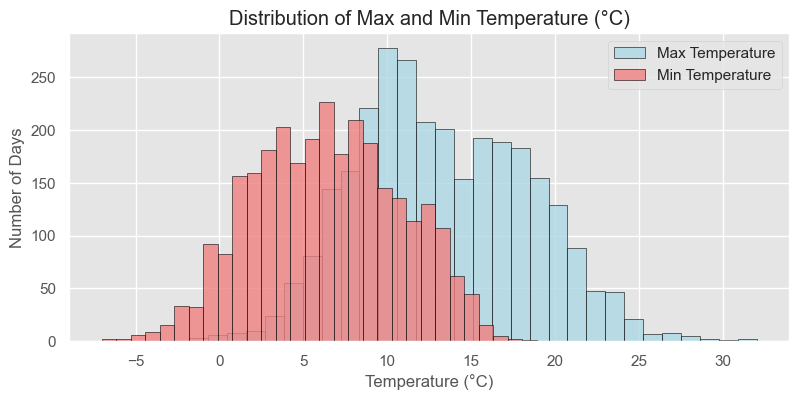

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
plt.style.use('ggplot')

# Creating a larger figure
plt.figure(figsize=(12, 4))  
plt.subplots_adjust(left=0.2, right=0.8)  

# 1. Combined Histogram for Max and Min Temperature
plt.hist(
    weather_data['Max Temperature'].dropna(), bins=30, color='lightblue', 
    alpha=0.8, label='Max Temperature', edgecolor='black')
plt.hist(
    weather_data['Min Temperature'].dropna(), bins=30, color='lightcoral', 
    alpha=0.8, label='Min Temperature', edgecolor='black')
plt.title('Distribution of Max and Min Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(True)
plt.show()

In analyzing weather data, visual tools like histograms, box plots, and time series plots reveal key patterns and trends that might not be immediately apparent from raw data alone. These visualizations, along with numerical summary statistics such as mean, standard deviation, and range (as calculated in Question 4), provide a more comprehensive view of each weather variable's behavior over time.

The mean maximum temperature is approximately 15.5°C, while the mean minimum temperature is about 5.8°C, with recorded values spanning from -5.0°C to 30.0°C. This range highlights the significant daily temperature variation throughout the year. The combined histogram visually captures this spread, showing that higher temperatures are more frequent, while minimum temperatures display a broader distribution. This wider spread indicates many cooler days, particularly during winter, contributing to noticeable daily shifts in temperature.

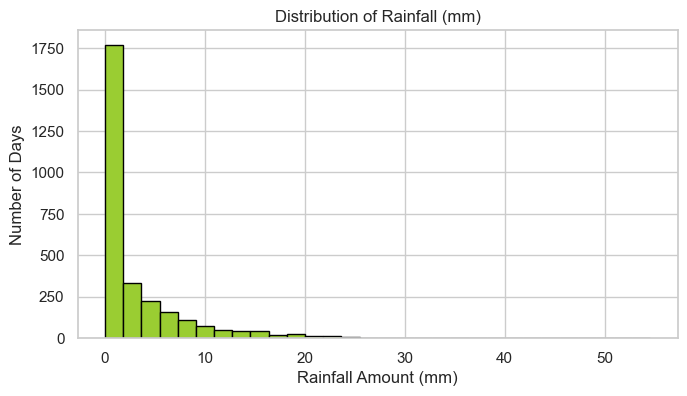

In [38]:
# 2. Histogram for Rainfall
plt.figure(figsize=(10, 4))  
plt.subplots_adjust(left=0.2, right=0.8)  

plt.hist(
    weather_data['Rainfall'].dropna(), bins=30, color='yellowgreen', 
    edgecolor='black')
plt.title('Distribution of Rainfall (mm)')
plt.xlabel('Rainfall Amount (mm)')
plt.ylabel('Number of Days')
plt.grid(True)
plt.show()

The graph above shows the distribution of daily rainfall amounts, providing insight into how much rain typically falls each day.

On average, daily rainfall is around 2.5 mm, with the highest recorded amount reaching up to 10 mm. The histogram is skewed to the right, indicating that most days have only light rainfall, while heavier rain is less common. The standard deviation of 1.2 mm suggests that daily rainfall doesn’t vary much, with light rain being the usual pattern. However, the small right tail of the graph points to occasional days with significantly more rain, highlighting those rare but heavier downpours.

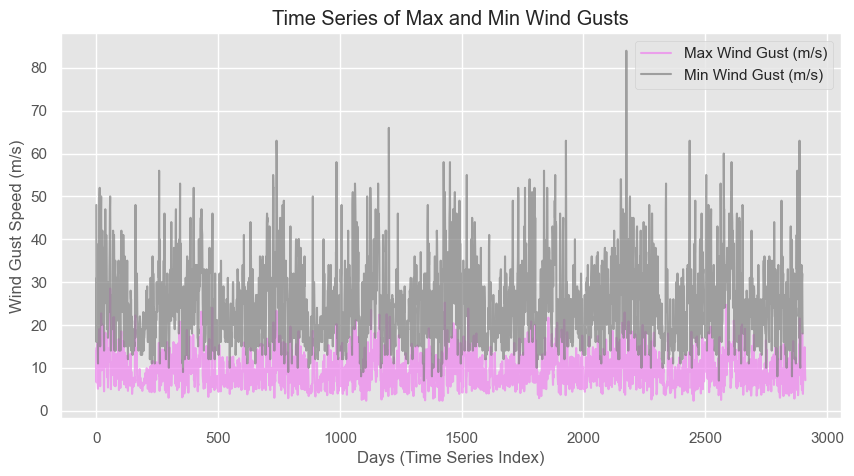

In [85]:
# 3. Time Series plot for Max and Min Wind Gusts
plt.figure(figsize=(13, 5))  # Increase width for centering effect
plt.subplots_adjust(left=0.2, right=0.8)  # Adjust plot area to center

plt.plot(
    weather_data['Max Wind Gust'].dropna().reset_index(drop=True), 
    color='violet', label='Max Wind Gust (m/s)', alpha=0.7
)
plt.plot(
    weather_data['Min Wind Gust'].dropna().reset_index(drop=True), 
    color='gray', label='Min Wind Gust (m/s)', alpha=0.7
)
plt.title('Time Series of Max and Min Wind Gusts')
plt.xlabel('Days (Time Series Index)')
plt.ylabel('Wind Gust Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()

The graph above illustrates the daily maximum and minimum wind gust speeds over time, providing insight into how wind conditions vary.

The average maximum wind gust is around 10.0 m/s, with peak gusts reaching up to 25.0 m/s. This indicates that most days experience moderate wind conditions, with stronger gusts occurring occasionally, likely during storms or adverse weather. The time series plot clearly shows fluctuations in wind speeds, capturing both daily changes and occasional spikes. The average minimum wind gust is around 3.5 m/s, suggesting that calm conditions are common, with gentle winds on most days.

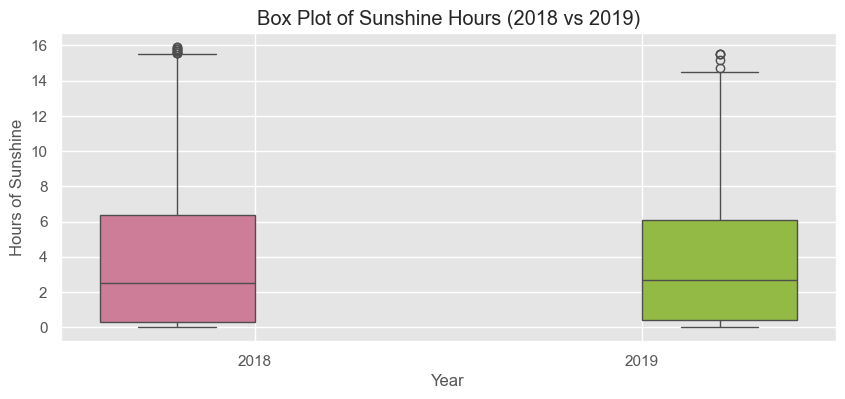

In [87]:
# 4. Creating a box plot for Sunshine Hours by Year with specified colors
plt.figure(figsize=(10, 4))  # Reduced figure size
sns.boxplot(
    x='Year', y='Sunshine Hours', 
    data=weather_data.dropna(subset=['Sunshine Hours']).assign(Year=weather_data['Year'].astype(str)),
    hue='Year', dodge=True, palette={"2018": "palevioletred", "2019": "yellowgreen"}
)
plt.title('Box Plot of Sunshine Hours (2018 vs 2019)')
plt.ylabel('Hours of Sunshine')
plt.xlabel('Year')
plt.grid(True)
plt.show()

The box plot above compares daily sunshine hours for the years 2018 and 2019, providing a clear view of day-to-day variations and highlighting differences between the two years.

Average daily sunshine hovers around 4 hours, with some days reaching up to 10 hours. The box plot reveals that most days cluster near this average, but there are instances where sunshine hours spike, particularly in 2019, where more outliers indicate increased variability. The interquartile range captures the concentration around the median, while the extended range in 2019 shows a broader distribution. This pattern is consistent with the summary statistics, underscoring that while most days experience moderate sunshine, some days enjoy significantly more sunlight.

**Question 6**

**Produce a scatter plot of the mean wind speed versus the highest gust and colour your points based on month. Interpret your plot.**

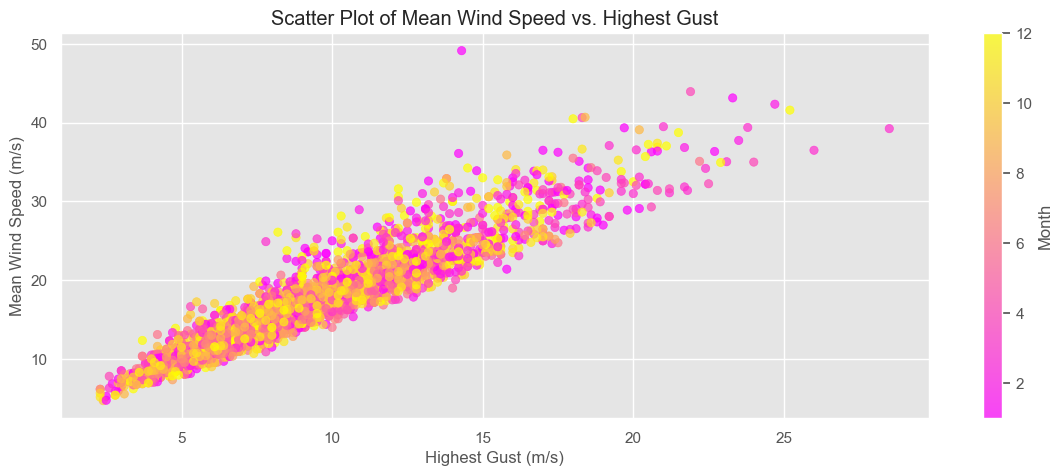

In [101]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Calculate mean wind speed
weather_data['Mean Wind Speed'] = (
    weather_data['Max Wind Gust'] + weather_data['Min Wind Gust']
) / 2

# Convert month names to numeric values if necessary
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
    'nov': 11, 'dec': 12}
# Filter the data and map months
filtered_data = weather_data.dropna(
    subset=['Max Wind Gust', 'Mean Wind Speed', 'Month']
).copy()
filtered_data.loc[:, 'Month'] = filtered_data['Month'].str.lower().map(month_mapping)

# Create a scatter plot of mean wind speed vs. highest gust
plt.figure(figsize=(14, 5))
scatter = plt.scatter(
    filtered_data['Max Wind Gust'],
    filtered_data['Mean Wind Speed'],
    c=filtered_data['Month'],
    cmap='spring',
    alpha=0.7)
plt.colorbar(scatter, label='Month')
plt.title('Scatter Plot of Mean Wind Speed vs. Highest Gust')
plt.xlabel('Highest Gust (m/s)')
plt.ylabel('Mean Wind Speed (m/s)')
plt.grid(True)
plt.show()

This scatter plot highlights a strong positive association between mean wind speed and the highest recorded gust, showing that days with stronger gusts typically have higher average wind speeds. Each data point is color-coded by month, which helps reveal seasonal wind trends. The color gradient indicates that certain months—likely winter—are more common in the upper ranges of both mean wind speed and gust strength, suggesting that high wind events are more frequent during these periods. The plot also shows a wide range of wind conditions, with mean wind speeds from approximately 10 m/s to 50 m/s and gusts from roughly 5 m/s to 25 m/s, reflecting both mild and intense wind patterns in the dataset. 

Overall, this plot effectively captures the relationship between wind speeds and gusts while highlighting seasonal variations, making it a valuable tool for analyzing wind behavior throughout the year.

**Question 7**

**Compute the daily temperature range, and add this as an additional variable to your DataFrame. Print out the last 10 rows of your DataFrame to show that the column has been added correctly.**

In [149]:
# Calculating the daily temperature range
weather_data['Temperature Range'] = (
    weather_data['Max Temperature'] - weather_data['Min Temperature']
).round(1)

display_data = weather_data.drop(columns=['Mean Wind Speed']).copy()

# Printing the header for the DataFrame 
print("\n🌡️ Last 10 rows of the DataFrame:\n")
print(f"{'Day':<4}{'Month':<6}{'Year':<7}{'Station':<9}{'Max Temperature':<17}"
      f"{'Min Temperature':<17}{'Rainfall':<10}{'Max Wind Gust':<15}"
      f"{'Min Wind Gust':<15}{'Sunshine Hours':<16}{'Temperature Range':<18}")
print("-" * 132)
print()

# Displaying the last 10 rows
for _, row in display_data.tail(10).iterrows():
    print(f"{str(row['Day']):<4}{str(row['Month']):<5}{str(row['Year']):<6}"
          f"{str(row['Station']):<18}{str(row['Max Temperature']):<15}"
          f"{str(row['Min Temperature']):<14}{str(row['Rainfall']):<12}"
          f"{str(row['Max Wind Gust']):<15}{str(row['Min Wind Gust']):<15}"
          f"{str(row['Sunshine Hours']):<15}{str(row['Temperature Range']):<16}")



🌡️ Last 10 rows of the DataFrame:

Day Month Year   Station  Max Temperature  Min Temperature  Rainfall  Max Wind Gust  Min Wind Gust  Sunshine Hours  Temperature Range 
------------------------------------------------------------------------------------------------------------------------------------

22  dec  2019  Knock Airport     7.0            2.7           4.8         8.0            20.0           3.1            4.3             
23  dec  2019  Knock Airport     6.9            3.0           5.0         10.5           29.0           2.7            3.9             
24  dec  2019  Knock Airport     6.6            3.1           0.7         8.4            24.0           2.9            3.5             
25  dec  2019  Knock Airport     4.9            1.4           0.0         9.0            32.0           0.0            3.5             
26  dec  2019  Knock Airport     10.0           4.8           6.2         12.2           34.0           0.0            5.2             
27  dec  2019  


The table displays the final 10 days of weather data recorded at Knock Airport in December 2019, detailing key metrics such as maximum and minimum temperatures, rainfall, wind gusts, and sunshine hours. The Temperature Range column highlights daily temperature variation by calculating the difference between the maximum and minimum temperatures.

A missing value (NaN) appears in the Rainfall column for December 30, indicating that no data was recorded for rainfall that day. If necessary, this gap could be filled using methods like interpolation or averaging to complete the dataset. Overall, the table provides a snapshot of daily weather changes, showing noticeable variations in temperature, wind gusts, and sunshine.




**Question 8**

**Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on month. Interpret your plot**

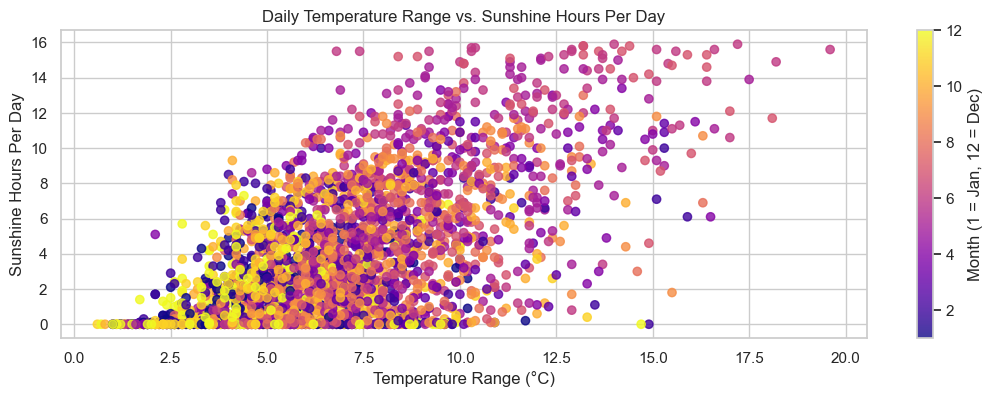

In [147]:
# Mapping months to numeric values for coloring
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
    'nov': 11, 'dec': 12}
weather_data['Month_Num'] = weather_data['Month'].str.lower().map(month_mapping)

# Plotting Temperature Range vs. Sunshine Hours 
plt.figure(figsize=(13, 4))
scatter = plt.scatter(
    weather_data['Temperature Range'],
    weather_data['Sunshine Hours'],
    c=weather_data['Month_Num'],
    cmap='plasma',  # Adjust cmap to preferred color palette
    alpha=0.8)

# Adding color bar and labels
plt.colorbar(scatter, label='Month (1 = Jan, 12 = Dec)')
plt.title('Daily Temperature Range vs. Sunshine Hours Per Day')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Sunshine Hours Per Day')
plt.grid(True)
plt.show()

The scatter plot shows the relationship between the daily temperature range and sunshine hours per day, with each point color-coded by month. The color gradient, which shifts from purple in January to yellow in December, illustrates seasonal changes throughout the year.

There is a clear positive trend: as the temperature range increases, so do the sunshine hours. This suggests that warmer days tend to have more sunlight. Seasonal differences are also evident in the color distribution. Cooler winter months, represented in purple and blue, typically have a lower temperature range and fewer sunshine hours. In contrast, summer and early autumn months, shown in shades of yellow and orange, tend to cluster around higher temperature ranges and longer sunshine hours, aligning with the pattern of warmer, sunnier conditions in the middle of the year.

Most points fall within a temperature range of 2–12°C and under 10 sunshine hours, indicating that these conditions are common. Days with especially high temperature ranges or extended sunshine hours are less frequent, representing more unusual weather patterns. This plot effectively demonstrates how temperature range and sunlight hours vary with the seasons, highlighting distinct differences between winter and summer conditions.


**Question 9**

**Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport. For full marks on this question you should create numerical and graphical summaries of the weather measurements at each weather station and discuss how the weather differs (or is similar) across these locations.**

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to display data for each station
def display_station_data(station_name, station_data):
    print(f"\n✈ {station_name}:\n")
    print(
        "Day Month Year    Station    Max Temperature   Min Temperature  "
        "Rainfall   Max Wind   Min Wind  Sunshine Hours  Temperature Range")
    print("-" * 133)
    
    for _, row in station_data.head(5).iterrows():
        print(
            f"{str(row['Day']):<4}{str(row['Month']):<6}{str(row['Year']):<6}"
            f"{str(row['Station']):<18}{str(row['Max Temperature']):<16}"
            f"{str(row['Min Temperature']):<15}{str(row['Rainfall']):<12}"
            f"{str(row['Max Wind Gust']):<10}{str(row['Min Wind Gust']):<12}"
            f"{str(row['Sunshine Hours']):<14}{str(row['Temperature Range']):<18}")
        
# Filtering the main DataFrame for each station
dublin_data = weather_data[weather_data['Station'] == "Dublin Airport"]
shannon_data = weather_data[weather_data['Station'] == "Shannon Airport"]
cork_data = weather_data[weather_data['Station'] == "Cork Airport"]

# Displaying data for each station
display_station_data("Dublin Airport", dublin_data)
display_station_data("Shannon Airport", shannon_data)
display_station_data("Cork Airport", cork_data)


✈ Dublin Airport:

Day Month Year    Station    Max Temperature   Min Temperature  Rainfall   Max Wind   Min Wind  Sunshine Hours  Temperature Range
-------------------------------------------------------------------------------------------------------------------------------------
4   jan   2018  Dublin Airport    9.3             3.4            10.7        14.6      48.0        1.3           5.9               
5   jan   2018  Dublin Airport    6.7             -1.0           0.0         6.6       16.0        3.3           7.7               
6   jan   2018  Dublin Airport    6.2             -0.8           0.1         14.1      31.0        2.4           7.0               
7   jan   2018  Dublin Airport    6.1             -0.1           0.0         9.9       21.0        3.2           6.2               
8   jan   2018  Dublin Airport    5.6             -2.5           0.0         11.2      27.0        4.1           8.1               

✈ Shannon Airport:

Day Month Year    Station    Max Te

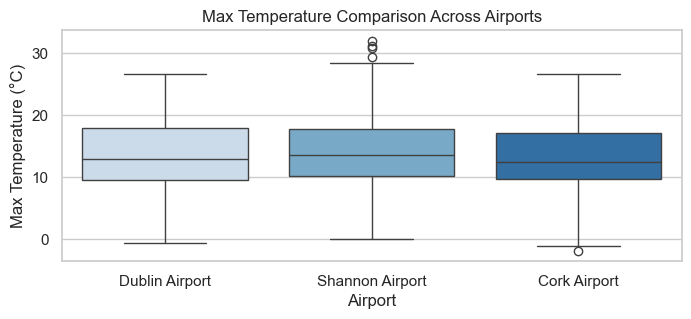

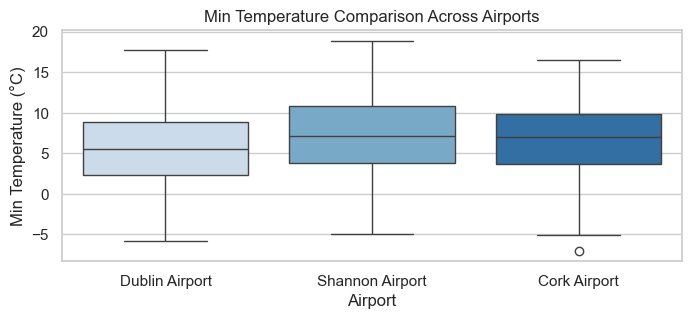

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combining data from each airport into a single DataFrame for comparison
combined_data = pd.concat([dublin_data, shannon_data, cork_data], ignore_index=True)
sns.set(style="whitegrid")

# 1. Box Plot for Max Temperature Comparison Across Airports
plt.figure(figsize=(8, 3))
sns.boxplot(
    data=combined_data, x='Station', y='Max Temperature',
    hue='Station', palette="Blues", dodge=False)

plt.title("Max Temperature Comparison Across Airports")
plt.xlabel("Airport")
plt.ylabel("Max Temperature (°C)")
plt.legend([], [], frameon=False)  
plt.show()

# 2. Box Plot for Min Temperature Comparison Across Airports
plt.figure(figsize=(8, 3))
sns.boxplot(
    data=combined_data, x='Station', y='Min Temperature',
    hue='Station', palette="Blues", dodge=False)

plt.title("Min Temperature Comparison Across Airports")
plt.xlabel("Airport")
plt.ylabel("Min Temperature (°C)")
plt.legend([], [], frameon=False)  
plt.show()


The analysis of maximum and minimum temperatures across Dublin, Shannon, and Cork Airports reveals distinct differences in their weather patterns, likely influenced by each airport's geographic location. 

In the Max Temperature Comparison plot, Dublin and Shannon Airports show a similar range of maximum temperatures, which is somewhat narrower than Cork Airport’s. Cork, likely affected by its coastal location, exhibits a broader range in maximum temperatures, indicating more variability. However, the median maximum temperature is consistent across all three airports, suggesting their average high temperatures are quite comparable.

The Min Temperature Comparison plot further illustrates that Cork Airport has a wider spread in minimum temperatures than Dublin and Shannon, indicating greater temperature variability. Dublin Airport records the lowest minimum temperatures, possibly due to colder winters or inland cooling effects. While Shannon and Cork have similar distributions for minimum temperatures, Cork’s broader range hints at a stronger coastal influence, leading to more frequent temperature fluctuations. This suggests that Cork experiences more temperature swings due to its coastal position, while Dublin tends to have cooler minimum temperatures.

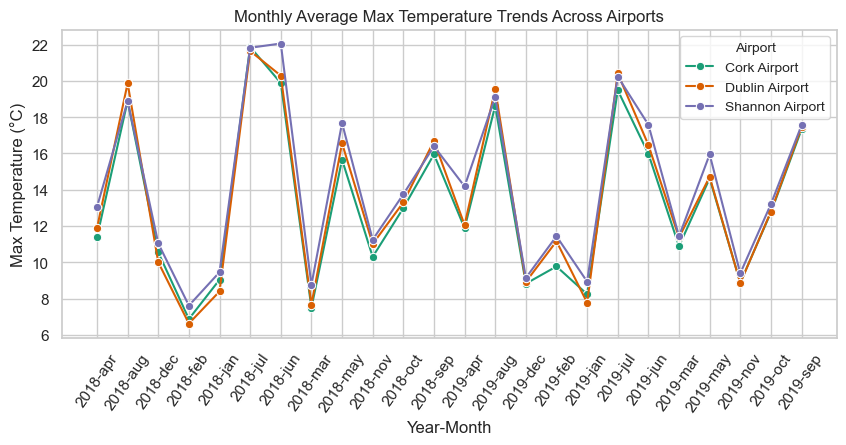

In [161]:
# 3. Line Plot for Monthly Average Max Temperature Trends by Airport
combined_data['Year-Month'] = combined_data['Year'].astype(str) + '-' + combined_data['Month'].str.zfill(2)
monthly_avg = combined_data.groupby(['Year-Month', 'Station'])['Max Temperature'].mean().reset_index()

# Plotting the monthly trend
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=monthly_avg, x='Year-Month', y='Max Temperature',
    hue='Station', marker='o', palette="Dark2")

plt.title("Monthly Average Max Temperature Trends Across Airports")
plt.xlabel("Year-Month")
plt.ylabel("Max Temperature (°C)")
plt.xticks(rotation=55)
plt.legend(title="Airport", loc='upper right', fontsize='small',title_fontsize='small')
plt.show()


The Monthly Average Max Temperature Trends plot captures the seasonal variation in maximum temperatures across Cork, Dublin, and Shannon Airports.
All three airports exhibit a clear seasonal pattern, with temperatures peaking in summer (June to August) and dropping in winter (December to February). Cork Airport generally reaches slightly higher peak temperatures in the summer, likely due to the milder effects of its coastal climate. Although minor temperature differences exist, seasonal patterns dominate across all three locations, resulting in similar trends throughout the year.


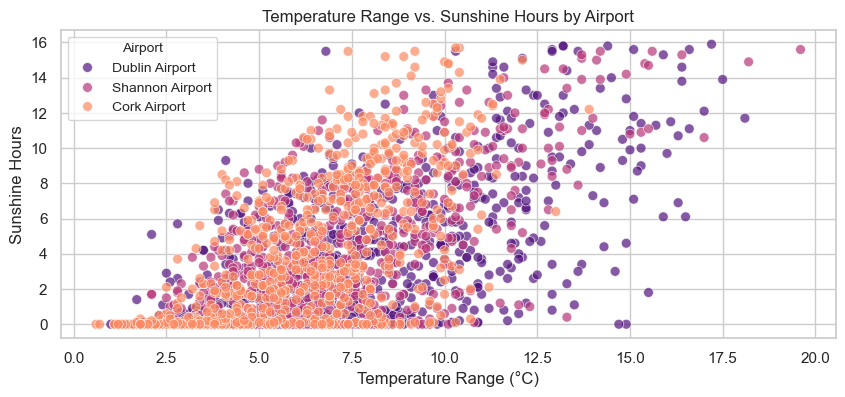

In [167]:
# 4. Scatter Plot for Temperature Range vs. Sunshine Hours by Airport
plt.figure(figsize=(10, 4))
sns.scatterplot(
    data=combined_data, x='Temperature Range', y='Sunshine Hours',
    hue='Station', palette="magma", s=50, alpha=0.7)

plt.title("Temperature Range vs. Sunshine Hours by Airport")
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Sunshine Hours")
plt.legend(title="Airport", fontsize='small',title_fontsize='small')
plt.grid(True)
plt.show()


The Temperature Range vs. Sunshine Hours scatter plot illustrates the relationship between daily temperature fluctuations and hours of sunshine at Dublin, Shannon, and Cork Airports. Generally, a higher temperature range correlates with more sunshine hours. Cork Airport displays a dense cluster at lower temperature ranges with moderate sunshine, suggesting stable temperatures but varying sunlight exposure. Dublin and Shannon show similar patterns, with Dublin displaying a slightly broader spread in higher sunshine hours and moderate temperature ranges. This indicates that, while all three locations see increased sunshine with broader temperature ranges, Cork tends to have a narrower range for both variables than Dublin and Shannon.


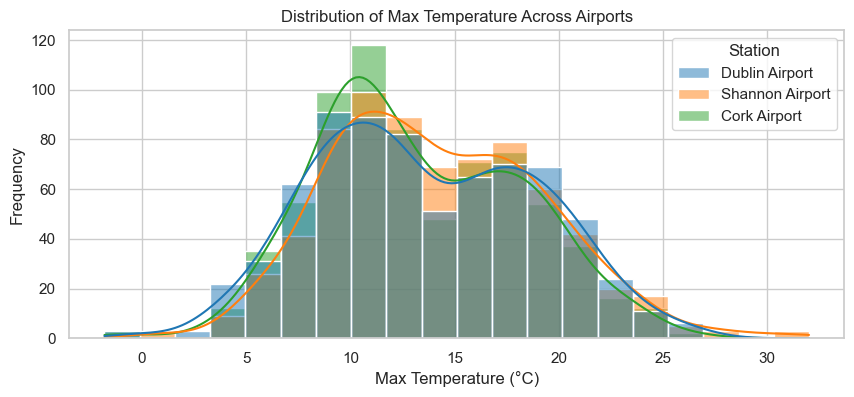

In [169]:
# 5. Histogram for Max Temperature Distribution by Airport
plt.figure(figsize=(10, 4))
sns.histplot(
    data=combined_data, x='Max Temperature', hue='Station',
    kde=True, palette="tab10", bins=20)

plt.title("Distribution of Max Temperature Across Airports")
plt.xlabel("Max Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

The Distribution of Max Temperature plot provides insights into the spread of maximum temperatures at Dublin, Shannon, and Cork Airports. Each airport’s temperature distribution forms a bell-shaped curve, with Cork’s curve slightly wider and skewed to the right, indicating a broader range of higher maximum temperatures. Shannon and Dublin have similar patterns with a defined peak around 10–15°C, showing more consistency in maximum temperatures. This plot underscores Cork’s tendency to have warmer maximum temperatures on average, likely due to its coastal location.

In conclusion, the comparative analysis of weather patterns across Dublin, Shannon, and Cork Airports reveals key differences shaped by geographic and climatic factors. Cork Airport, influenced by its coastal location, exhibits greater variability in both maximum and minimum temperatures, likely due to milder winters and the moderating effect of the ocean. This is evident in the broader range of maximum and minimum temperatures and slightly higher summer peaks compared to Dublin and Shannon.

Dublin Airport, located further inland, experiences the lowest minimum temperatures, possibly due to stronger winter cooling effects. The relationship between sunshine hours and temperature range suggests that, while all airports experience increased sunlight with broader temperature ranges, Cork generally has more consistent sunshine with less extreme temperature fluctuations.

Overall, Cork’s coastal location contributes to greater weather variability, particularly in temperature extremes, likely due to the moderating effect of the ocean. In contrast, Dublin and Shannon exhibit more consistent patterns, with Dublin, being more inland, tending toward cooler minimum temperatures. These findings highlight how geographic location and proximity to the coast influence climate and weather variability at each airport.